In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import zscore

data = pd.read_csv('/content/sample_data/The Housing price (1).csv', sep = ';')





In [ ]:
print(data.head())

print(data.info())

print(data.shape)

data.describe()



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


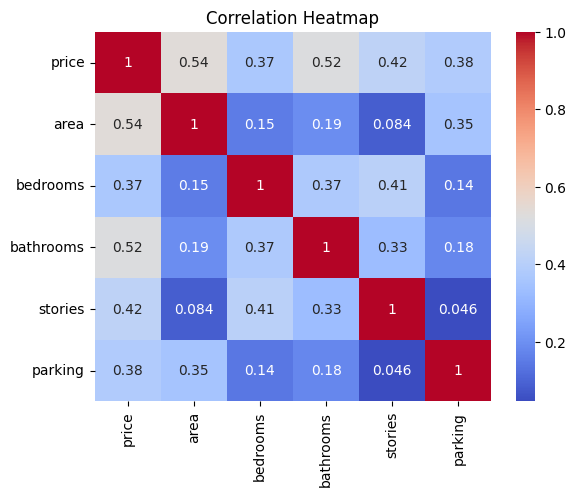

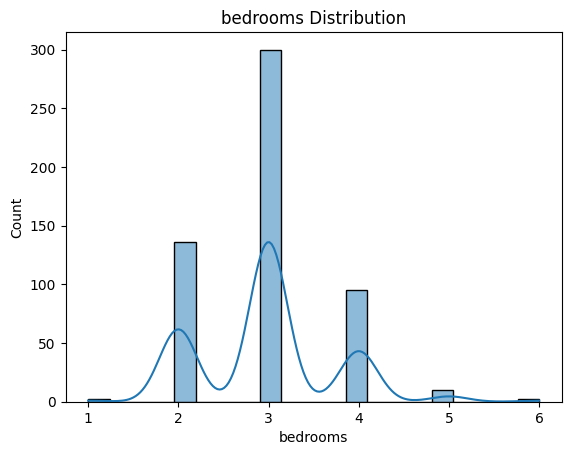

bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: price, dtype: float64
stories               1             2             3             4
guestroom                                                        
no         3.946315e+06  4.525015e+06  5.626147e+06  7.214531e+06
yes        5.286474e+06  5.848174e+06  6.088600e+06  7.191864e+06
mainroad
yes    468
no      77
Name: count, dtype: int64


In [ ]:

numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.histplot(data['bedrooms'], kde=True)
plt.title('bedrooms Distribution')
plt.show()



grouped_data = data.groupby('bedrooms')['price'].mean()
print(grouped_data)


pivot_table = data.pivot_table(values='price', index='guestroom', columns='stories', aggfunc='mean')
print(pivot_table)


mainroad_counts = data['mainroad'].value_counts()
print(mainroad_counts)





In [ ]:
data['area'].fillna(data['area'].mean(), inplace=True)
data['price'].fillna(data['price'].mean(), inplace=True)
data['bedrooms'].fillna(data['bedrooms'].mean(), inplace=True)
data['bathrooms'].fillna(data['bathrooms'].mean(), inplace=True)
data['stories'].fillna(data['stories'].mean(), inplace=True)
data['parking'].fillna(data['parking'].mean(), inplace=True)



data.isnull().sum()

<ipython-input-34-e48ce5e2a42f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['area'].fillna(data['area'].mean(), inplace=True)
<ipython-input-34-e48ce5e2a42f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


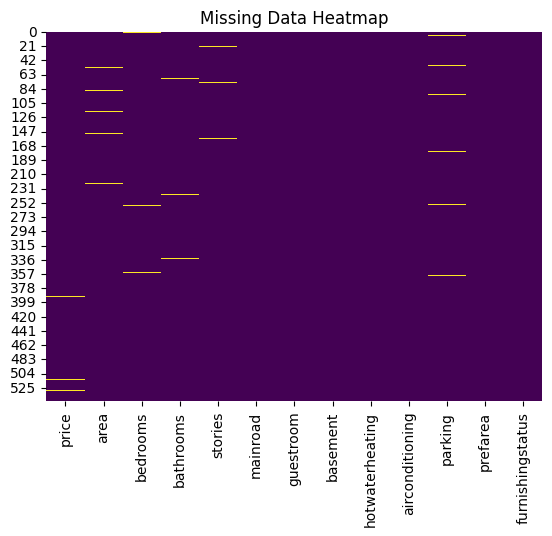

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [ ]:

pivot = data.pivot(index='mainroad', columns='area', values='price')
print(pivot)

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
pivot_table = data.pivot_table( values='price', index='furnishingstatus', columns='area', aggfunc='sum')
pivot_table


area,1650.0,1700.0,1836.0,1905.0,1950.0,2000.0,2015.0,2135.0,2145.0,2160.0,...,11175.0,11410.0,11440.0,11460.0,12090.0,12900.0,12944.0,13200.0,15600.0,16200.0
furnishingstatus,,,,,,,,,,,,,,,,,,,,,
furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13517000.0,NaN,...,7000000.0,5110000.0,NaN,NaN,6790000.0,4900000.0,NaN,16730000.0,NaN,NaN
semi-furnished,NaN,NaN,2275000.0,4340000.0,NaN,2660000.0,3850000.0,NaN,NaN,3080000.0,...,NaN,NaN,7343000.0,5873000.0,NaN,NaN,NaN,NaN,5943000.0,NaN
unfurnished,3150000.0,1890000.0,NaN,NaN,5670000.0,NaN,NaN,3500000.0,8120000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3500000.0,NaN,NaN,10150000.0


In [ ]:
stacked = data.stack()
stacked

0    price                  13300000
     area                       7420
     bedrooms                      4
     bathrooms                     2
     stories                       3
                            ...     
544  hotwaterheating              no
     airconditioning              no
     parking                       0
     prefarea                     no
     furnishingstatus    unfurnished
Length: 7085, dtype: object

In [ ]:
unstacked = stacked.unstack()
unstacked

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Bins
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,High
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,High
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,Low
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,High
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,Low
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,Low
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,Low
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,Low


In [ ]:
exploded = data.explode('guestroom')
exploded

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
melted_data = data.melt(id_vars=['price'], var_name='features', value_name='Value')
melted_data


,price,features,Value
0,13300000,area,7420
1,12250000,area,8960
2,12250000,area,9960
3,12215000,area,7500
4,11410000,area,7420
...,...,...,...
6535,1820000,furnishingstatus,unfurnished
6536,1767150,furnishingstatus,semi-furnished
6537,1750000,furnishingstatus,unfurnished
6538,1750000,furnishingstatus,furnished


In [ ]:
dummies = pd.get_dummies(data, columns=['mainroad'], drop_first=True)
dummies


,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Bins,mainroad_yes
0,13300000,7420,4,2,3,no,no,no,yes,2,yes,furnished,High,True
1,12250000,8960,4,4,4,no,no,no,yes,3,no,furnished,High,True
2,12250000,9960,3,2,2,no,yes,no,no,2,yes,semi-furnished,Low,True
3,12215000,7500,4,2,2,no,yes,no,yes,3,yes,furnished,High,True
4,11410000,7420,4,1,2,yes,yes,no,yes,2,no,furnished,High,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,no,yes,no,no,2,no,unfurnished,Low,True
541,1767150,2400,3,1,1,no,no,no,no,0,no,semi-furnished,Low,False
542,1750000,3620,2,1,1,no,no,no,no,0,no,unfurnished,Low,True
543,1750000,2910,3,1,1,no,no,no,no,0,no,furnished,Low,False


In [ ]:
result = pd.crosstab(data['guestroom'], data['parking'])
result

parking,0,1,2,3
guestroom,,,,
no,252,99,86,11
yes,47,27,22,1


In [ ]:
data['Bins'] = pd.cut(data['bedrooms'], bins=[1, 3, 5], labels=['Low', 'High'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Bins
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,High
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,High
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,Low
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,High
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,Low
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,Low
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,Low
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,Low


In [ ]:
label_encoder = LabelEncoder()
data['mainroad'] = label_encoder.fit_transform(data['mainroad'])


one_hot = pd.get_dummies(data[['prefarea', 'airconditioning']])
data = pd.concat([data, one_hot], axis=1)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Z_Score,prefarea_no,prefarea_yes,airconditioning_no,airconditioning_yes
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished,4.566365,False,True,False,True
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished,4.004484,True,False,False,True
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished,4.004484,False,True,True,False
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished,3.985755,False,True,False,True
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished,3.554979,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished,-1.576868,True,False,True,False
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished,-1.605149,True,False,True,False
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished,-1.614327,True,False,True,False
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished,-1.614327,True,False,True,False


In [ ]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

3430000.0
5740000.0
2310000.0


In [ ]:
data_cleaned = data[(data['price'] >= (Q1 - 1.5 * IQR)) & (data['price'] <= (Q3 + 1.5 * IQR))]
data_cleaned.sum()


,0
price,2438351440
area,2682605
bedrooms,1560
bathrooms,668
stories,948
mainroad,yesyesyesyesyesyesyesyesyesyesyesyesyesyesyesy...
guestroom,noyesnoyesnonoyesyesyesnoyesyesnonononononoyes...
basement,yesyesnononoyesyesyesyesnoyesyesnoyesyesnonono...
hotwaterheating,nononononoyesnononononononoyesnononononononoye...
airconditioning,noyesyesyesyesnoyesyesyesyesyesyesnonoyesyesye...


In [ ]:
data['Z_Score'] = zscore(data['price'])
outliers = data[data['Z_Score'].abs() > 5]
outliers.sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
data.rename(columns={'stories': 'floors'}, inplace=True)
data


,price,area,bedrooms,bathrooms,floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Z_Score,prefarea_no,prefarea_yes,airconditioning_no,airconditioning_yes
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished,4.566365,False,True,False,True
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished,4.004484,True,False,False,True
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished,4.004484,False,True,True,False
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished,3.985755,False,True,False,True
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished,3.554979,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished,-1.576868,True,False,True,False
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished,-1.605149,True,False,True,False
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished,-1.614327,True,False,True,False
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished,-1.614327,True,False,True,False


In [ ]:
data['bedrooms'] = data['bedrooms'].astype('float')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [ ]:
df1 = pd.DataFrame({'area': [7500, 6040, 5400], 'bedrooms': [4, 2, 2]})
df2 = pd.DataFrame({'area': [7500, 6040, 5400], 'mainroad': ['yes', 'no', 'yes']})
df_merged = pd.merge(df1, df2, on='area')
df_merged

,area,bedrooms,mainroad
0,7500,4,yes
1,6040,2,no
2,5400,2,yes


In [ ]:
train = data.sample(frac=0.7, random_state=42)
test = data.drop(train.index)
print(train)
print(test)


       price   area  bedrooms  bathrooms  floors  mainroad guestroom basement  \
316  4060000   5900         4          2       2         0        no      yes   
77   6650000   6500         3          2       3         1        no       no   
360  3710000   4040         2          1       1         1        no       no   
90   6440000   5000         3          1       2         1        no       no   
493  2800000   3960         3          1       1         1        no       no   
..       ...    ...       ...        ...     ...       ...       ...      ...   
28   8400000   7950         5          2       2         1        no      yes   
170  5250000   5500         3          2       1         1        no      yes   
142  5600000  10500         4          2       2         1        no       no   
453  3150000   3069         2          1       1         1        no       no   
386  3535000   3850         3          1       1         1        no       no   

    hotwaterheating aircond